- MNIST
- Dataloader, Transformation
- Multilayer Neural Networks, Activation Function
- Loss and Optimizer
- Training Loop (batch training)
- Model evaluation
- GPU support

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader


# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# hyper parameters
input_size = 784  # 28*28
hidden_size = 500
num_classes = 10  # 10个数字
epoch = 2  # may increase
batch_size = 100
lr = 0.001


# MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(), 
                                           download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, 
                                          transform=transforms.ToTensor())


train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)   
# test也要batch？


examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)



In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 2
batch_size = 64
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

examples = iter(test_loader)
# example_data, example_targets = next(examples)
samples, labels = next(examples)

# batch_size, one channel(没有其他颜色)，
print(samples.shape, labels.shape)
# print(samples[1][0])

# plot
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='coolwarm')  # 绘制图像的准备。 # colormap，
    # plt.plot(samples[i][0])   # 这个只能画出“线性”的关系，而不能画出“像素”的关系
plt.show()




- neural network

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out   # don't activation function
    
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# reaining loop

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # -> 100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)
    
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        if (i+1) % 100 == 0:
            print(f'epoch {epoch}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss:.4f}')
        
# test
with torch.no_grad():
    n_test_steps = len(test_loader)
    print(n_test_steps)
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        _, predictions = torch.max(outputs, 1)  # 取 index
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    
    acc = 100.0 * n_correct / n_samples
    print(f'accuracy = {acc}')

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out   # don't activation function
    
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# reaining loop

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # -> 100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)
    
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        if (i+1) % 100 == 0:
            print(f'epoch {epoch}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss:.4f}')
        
# test
with torch.no_grad():
    n_test_steps = len(test_loader)
    print(n_test_steps)
    n_correct = 0
    n_samples = 0
    for i, (images, labels) in enumerate(test_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        _, predictions = torch.max(outputs, 1)  # 取 index
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
        acc = 100.0 * n_correct / n_samples
        if (i+1) % 10 == 0:
            print(f'step {i+1}/{n_test_steps}, accuracy = {acc:.4f}')
    

# - tensorboard

- images

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import sys

from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

# ----------------------------------------------------------------------
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 2
batch_size = 64
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

examples = iter(test_loader)
# example_data, example_targets = next(examples)
samples, labels = next(examples)

# batch_size, one channel(没有其他颜色)，
print(samples.shape, labels.shape)
# print(samples[1][0])

# plot
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='coolwarm')  # 绘制图像的准备。 # colormap，
    # plt.plot(samples[i][0])   # 这个只能画出“线性”的关系，而不能画出“像素”的关系
# plt.show()

# tensorboard 1
img_grid = torchvision.utils.make_grid(samples)
writer.add_image('mnist_images', img_grid)
writer.close()
sys.exit()

# ------------------------------------------------------------------------------

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out   # don't activation function
    
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# tensorboard 2
writer.add_graph(model, samples.reshape(-1, 28*28).to(device))
writer.close()
sys.exit()

# --------------------------------------------------------
# reaining loop

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # -> 100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)
    
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        if (i+1) % 100 == 0:
            print(f'epoch {epoch}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss:.4f}')
        
# test
with torch.no_grad():
    n_test_steps = len(test_loader)
    print(n_test_steps)
    n_correct = 0
    n_samples = 0
    for i, (images, labels) in enumerate(test_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        _, predictions = torch.max(outputs, 1)  # 取 index
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
        acc = 100.0 * n_correct / n_samples
        if (i+1) % 10 == 0:
            print(f'step {i+1}/{n_test_steps}, accuracy = {acc:.4f}')
    

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import sys

from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

# ----------------------------------------------------------------------
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 2
batch_size = 64
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

examples = iter(test_loader)
# example_data, example_targets = next(examples)
samples, labels = next(examples)

# batch_size, one channel(没有其他颜色)，
print(samples.shape, labels.shape)
# print(samples[1][0])

# plot
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='coolwarm')  # 绘制图像的准备。 # colormap，
    # plt.plot(samples[i][0])   # 这个只能画出“线性”的关系，而不能画出“像素”的关系
# plt.show()

# tensorboard 1
img_grid = torchvision.utils.make_grid(samples)
writer.add_image('mnist_images', img_grid)
writer.close()
sys.exit()

# ------------------------------------------------------------------------------

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out   # don't activation function
    
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# tensorboard 2
writer.add_graph(model, samples.reshape(-1, 28*28).to(device))
writer.close()
sys.exit()

# --------------------------------------------------------
# reaining loop

n_total_steps = len(train_loader)

running_loss = 0.0
running_correct = 0.1
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # -> 100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)
    
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # loss values and accuracy 
        running_loss += loss.item()
        _, predictions = torch.max(outputs, 1)
        running_correct += (predictions == labels).sum().item()
        
        if (i+1) % 100 == 0:
            print(f'epoch {epoch}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss:.4f}')
            writer.add_scalar('training loss', running_loss / 100, epoch * n_total_steps + i)
            writer.add_scalar('accuracy', running_correct / 100, epoch * n_total_steps + i)
            running_loss = 0.0
            running_correct = 0.0
# test
with torch.no_grad():
    n_test_steps = len(test_loader)
    print(n_test_steps)
    n_correct = 0
    n_samples = 0
    for i, (images, labels) in enumerate(test_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        _, predictions = torch.max(outputs, 1)  # 取 index
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
        acc = 100.0 * n_correct / n_samples
        if (i+1) % 10 == 0:
            print(f'step {i+1}/{n_test_steps}, accuracy = {acc:.4f}')
    

- tensorboard 3

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import sys

from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

# ----------------------------------------------------------------------
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 2
batch_size = 64
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

examples = iter(test_loader)
# example_data, example_targets = next(examples)
samples, labels = next(examples)

# batch_size, one channel(没有其他颜色)，
print(samples.shape, labels.shape)
# print(samples[1][0])

# plot
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='coolwarm')  # 绘制图像的准备。 # colormap，
    # plt.plot(samples[i][0])   # 这个只能画出“线性”的关系，而不能画出“像素”的关系
# plt.show()

# tensorboard 1
img_grid = torchvision.utils.make_grid(samples)
writer.add_image('mnist_images', img_grid)
writer.close()
# sys.exit()

# ------------------------------------------------------------------------------

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out   # don't activation function
    
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# tensorboard 2
writer.add_graph(model, samples.reshape(-1, 28*28).to(device))
writer.close()
sys.exit()

# --------------------------------------------------------
# reaining loop

n_total_steps = len(train_loader)

running_loss = 0.0
running_correct = 0.1
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # -> 100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)
    
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # loss values and accuracy 
        running_loss += loss.item()
        _, predictions = torch.max(outputs, 1)
        running_correct += (predictions == labels).sum().item()
        
        if (i+1) % 100 == 0:
            print(f'epoch {epoch}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss:.4f}')
            writer.add_scalar('training loss', running_loss / 100, epoch * n_total_steps + i)
            writer.add_scalar('accuracy', running_correct / 100, epoch * n_total_steps + i)
            running_loss = 0.0
            running_correct = 0.0
# test
with torch.no_grad():
    n_test_steps = len(test_loader)
    print(n_test_steps)
    n_correct = 0
    n_samples = 0
    for i, (images, labels) in enumerate(test_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        _, predictions = torch.max(outputs, 1)  # 取 index
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
        acc = 100.0 * n_correct / n_samples
        if (i+1) % 10 == 0:
            print(f'step {i+1}/{n_test_steps}, accuracy = {acc:.4f}')
    

- tensorboard 3

cuda
torch.Size([64, 1, 28, 28]) torch.Size([64])
938
epoch 1/1, step 100/938, loss = 0.3268
epoch 1/1, step 200/938, loss = 0.1863
epoch 1/1, step 300/938, loss = 0.1936
epoch 1/1, step 400/938, loss = 0.2932
epoch 1/1, step 500/938, loss = 0.2295
epoch 1/1, step 600/938, loss = 0.0685
epoch 1/1, step 700/938, loss = 0.2538
epoch 1/1, step 800/938, loss = 0.2269
epoch 1/1, step 900/938, loss = 0.1619
157
step 10/157, accuracy = 96.7188
step 20/157, accuracy = 95.5469
step 30/157, accuracy = 95.3646
step 40/157, accuracy = 94.8438
step 50/157, accuracy = 95.2188
step 60/157, accuracy = 95.2604
step 70/157, accuracy = 95.1116
step 80/157, accuracy = 95.2148
step 90/157, accuracy = 95.5556
step 100/157, accuracy = 95.6094
step 110/157, accuracy = 95.7528
step 120/157, accuracy = 95.9896
step 130/157, accuracy = 96.1298
step 140/157, accuracy = 96.2723
step 150/157, accuracy = 96.3854


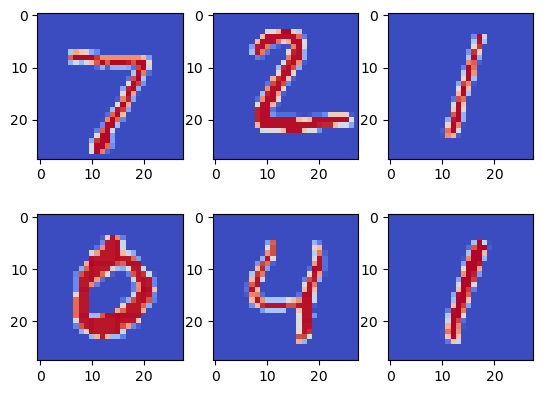

In [7]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import sys

from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('runs/mnist1')

# ----------------------------------------------------------------------
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 1
batch_size = 64
lr = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

examples = iter(test_loader)
# example_data, example_targets = next(examples)
samples, labels = next(examples)

# batch_size, one channel(没有其他颜色)，
print(samples.shape, labels.shape)
# print(samples[1][0])

# plot
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='coolwarm')  # 绘制图像的准备。 # colormap，
    # plt.plot(samples[i][0])   # 这个只能画出“线性”的关系，而不能画出“像素”的关系
# plt.show()

# tensorboard 1
img_grid = torchvision.utils.make_grid(samples)
writer.add_image('mnist_images', img_grid)
writer.close()
# sys.exit()

# ------------------------------------------------------------------------------

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out   # don't activation function
    
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# tensorboard 2
writer.add_graph(model, samples.reshape(-1, 28*28).to(device))
writer.close()
# sys.exit()

# --------------------------------------------------------
# reaining loop

n_total_steps = len(train_loader)
print(n_total_steps)

running_loss = 0.0
running_correct = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # -> 100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)
    
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # loss values and accuracy 
        running_loss += loss.item()
        _, predictions = torch.max(outputs, 1)
        running_correct += (predictions == labels).sum().item()
        
        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss:.4f}')
            writer.add_scalar('training loss', running_loss / 100, epoch * n_total_steps + i)
            writer.add_scalar('accuracy', running_correct / 100, epoch * n_total_steps + i)
            running_loss = 0.0
            running_correct = 0
# test
with torch.no_grad():
    n_test_steps = len(test_loader)
    print(n_test_steps)
    n_correct = 0
    n_samples = 0
    for i, (images, labels) in enumerate(test_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        _, predictions = torch.max(outputs, 1)  # 取 index
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
        acc = 100.0 * n_correct / n_samples
        if (i+1) % 10 == 0:
            print(f'step {i+1}/{n_test_steps}, accuracy = {acc:.4f}')
    

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs
